# Lung Immune compartment

In here I will highlight the different compartments of the Lung cell atlas, for visualisation purposes only, as the DEG analyses are done in each specific compartment. I will subset the dataset as in the compartment notebooks, therefore removing cell types reported as cycling, doublets or low quality.

In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.sparse
import anndata
import seaborn as sns
#import scvelo as scv

#import milopy.core as milo
#import milopy.plot as milopl


In [2]:
sc.set_figure_params(dpi=150, dpi_save=300, transparent=False) # Makes it more visible

In [3]:
storage_path = '/mnt/storage/Github/Immune_Adaptation_Atlas/h5ad_files/'

In [4]:
adata_immune = sc.read_h5ad(storage_path + 'Lung_Immune_compartment.h5ad')
adata_immune

AnnData object with n_obs × n_vars = 85164 × 20922
    obs: 'Celltypes', 'Celltypes_master_high', 'Celltypes_master_higher', 'Celltypes_master_higher_immune', 'Loc_true', 'Material', 'Donor', 'Donor_ID_2', 'Gender', 'Sample', 'ID', 'Protocol_plot', 'Version', 'Study', 'PoolDon', 'DonorPool', 'scDonor_snBatch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'gene_ids-0', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'gene_ids-1', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'feature_types-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Celltypes_colors', 'Celltypes_int_F_colors', 'Celltypes_int_colors', 'Celltypes_int_updB_colors', 'Celltypes_master_higher_immune_colors', 'ID_colors', 'Loc_true_colors', 'hvg', 'leiden', 'leiden_colors',

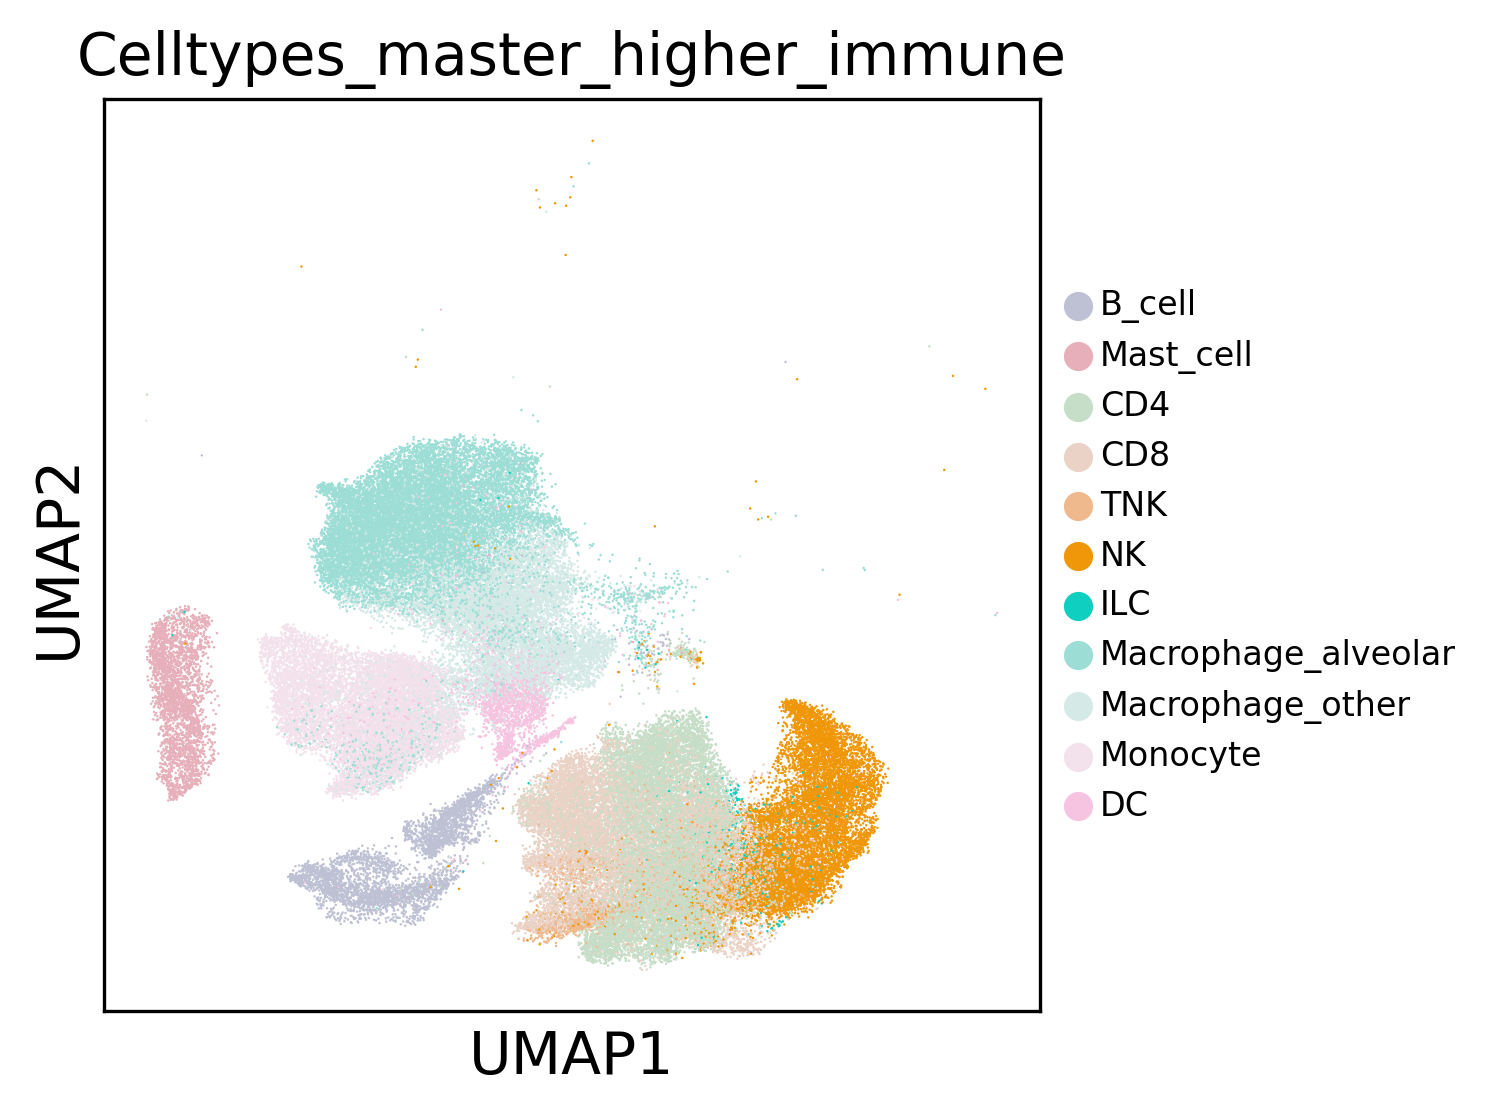

In [5]:
sc.pl.umap(adata_immune, color=["Celltypes_master_higher_immune"],#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

## Run HVG, PCA and UMAP

In [6]:
sc.settings.verbosity = 4
sc.pp.highly_variable_genes(adata_immune, min_mean=0.3, max_mean=5)

extracting highly variable genes
    Gene indices [8669, 11547] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


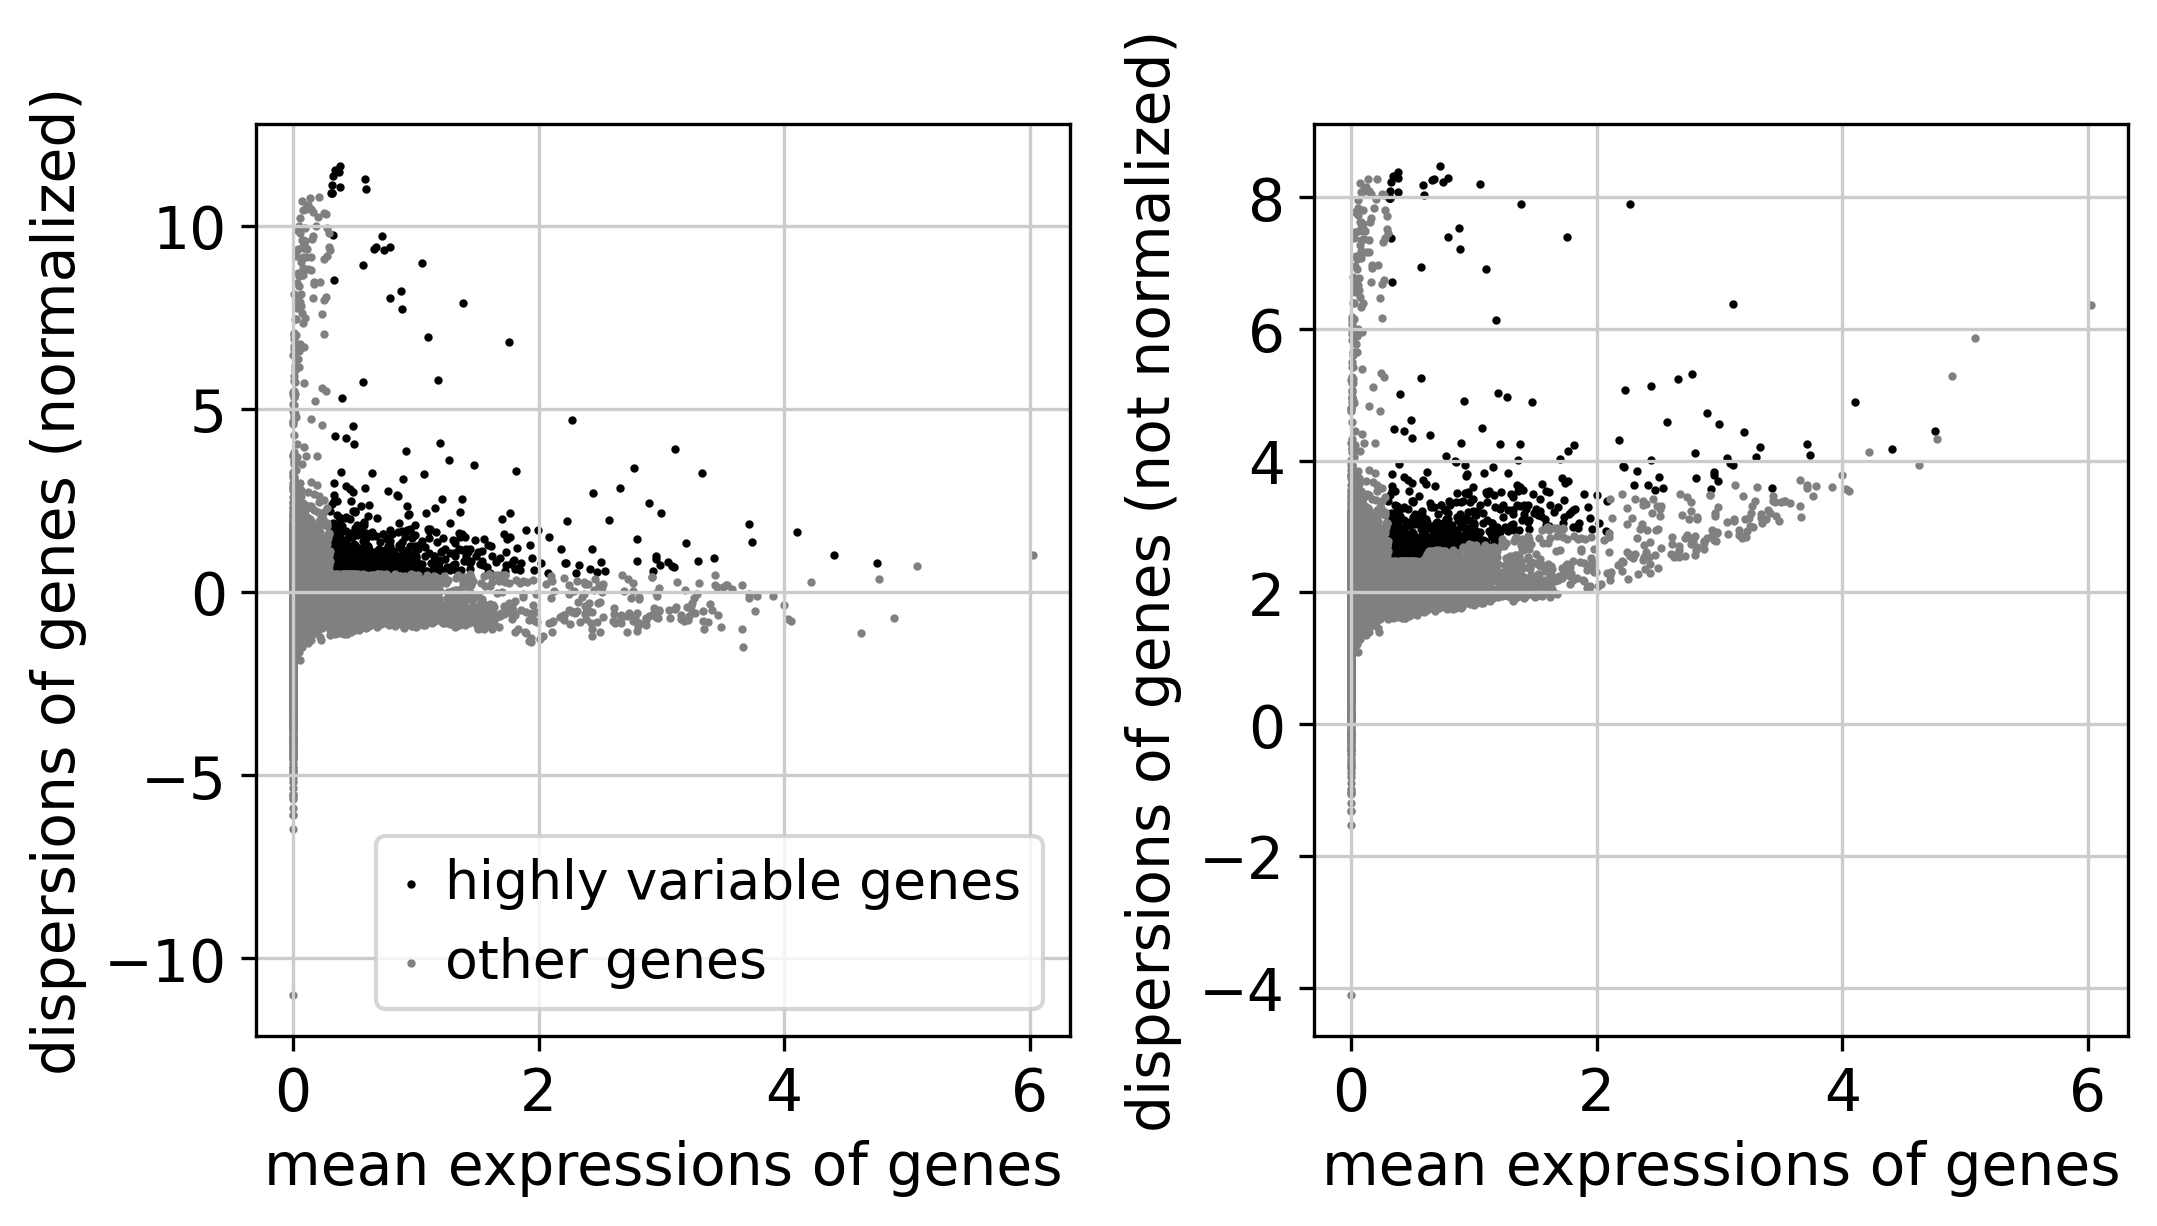

In [7]:
sc.pl.highly_variable_genes(adata_immune)

normalizing counts per cell
    finished (0:00:00)


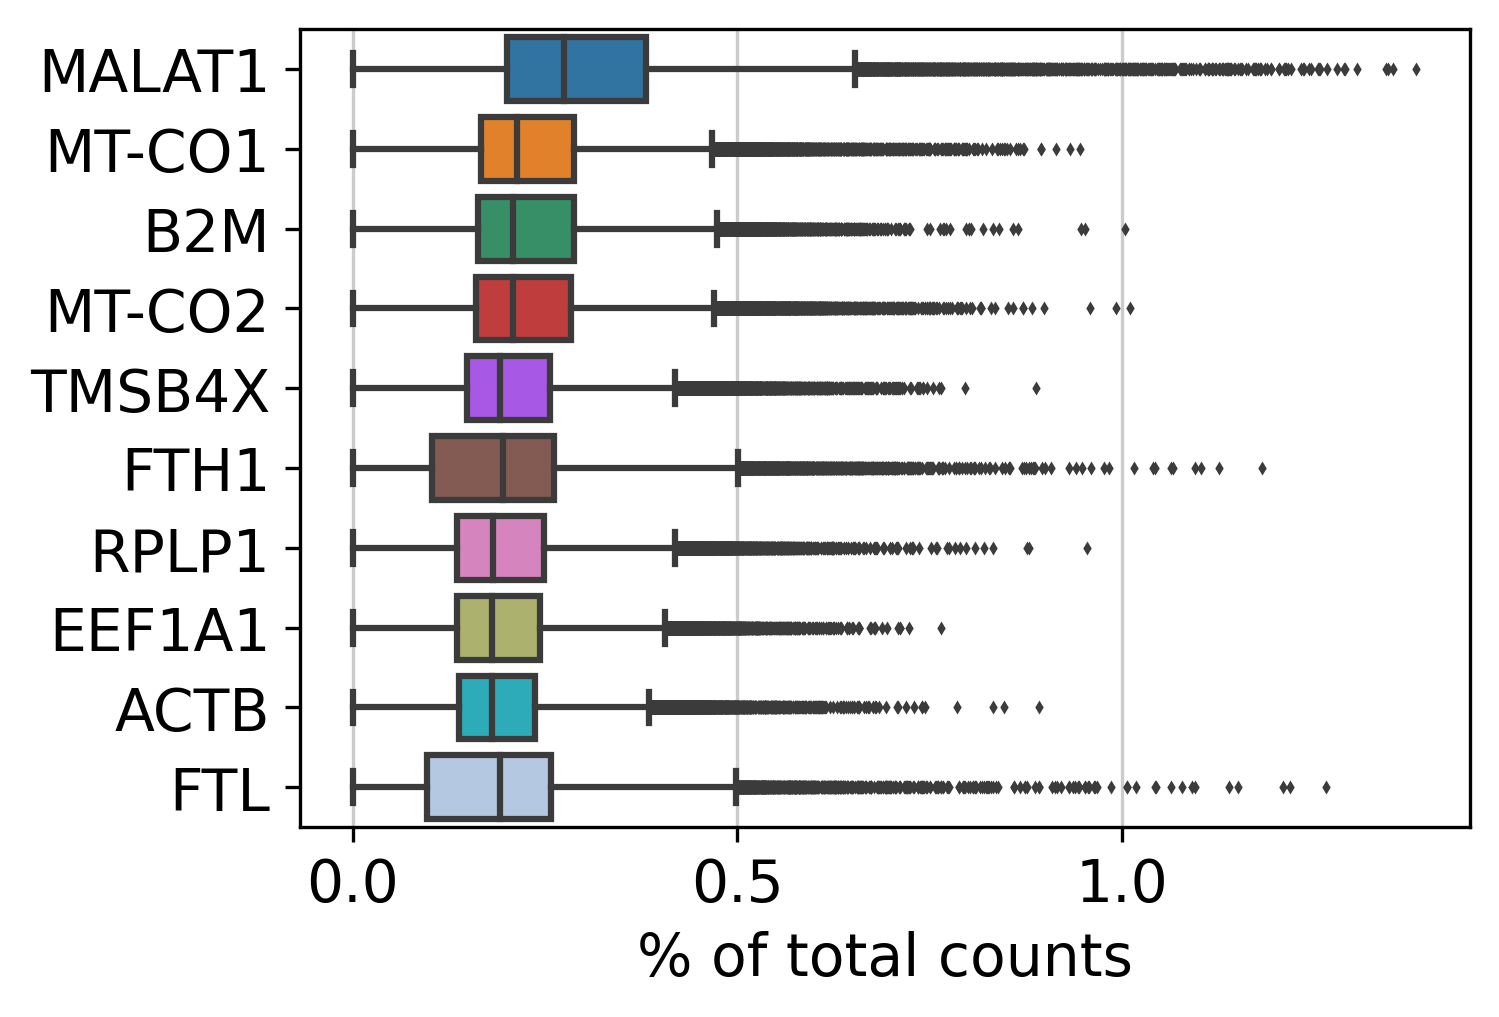

In [8]:
sc.pl.highest_expr_genes(adata_immune, n_top=10, show=True)

In [9]:
sc.tl.pca(adata_immune, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)


In [11]:
sc.tl.umap(adata_immune)

computing UMAP


/home/irepan/anaconda3/envs/pyscenic/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|█████████████████████████████████████████████████████████████████| 200/200 [00:17<00:00, 11.45it/s]

    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:30)


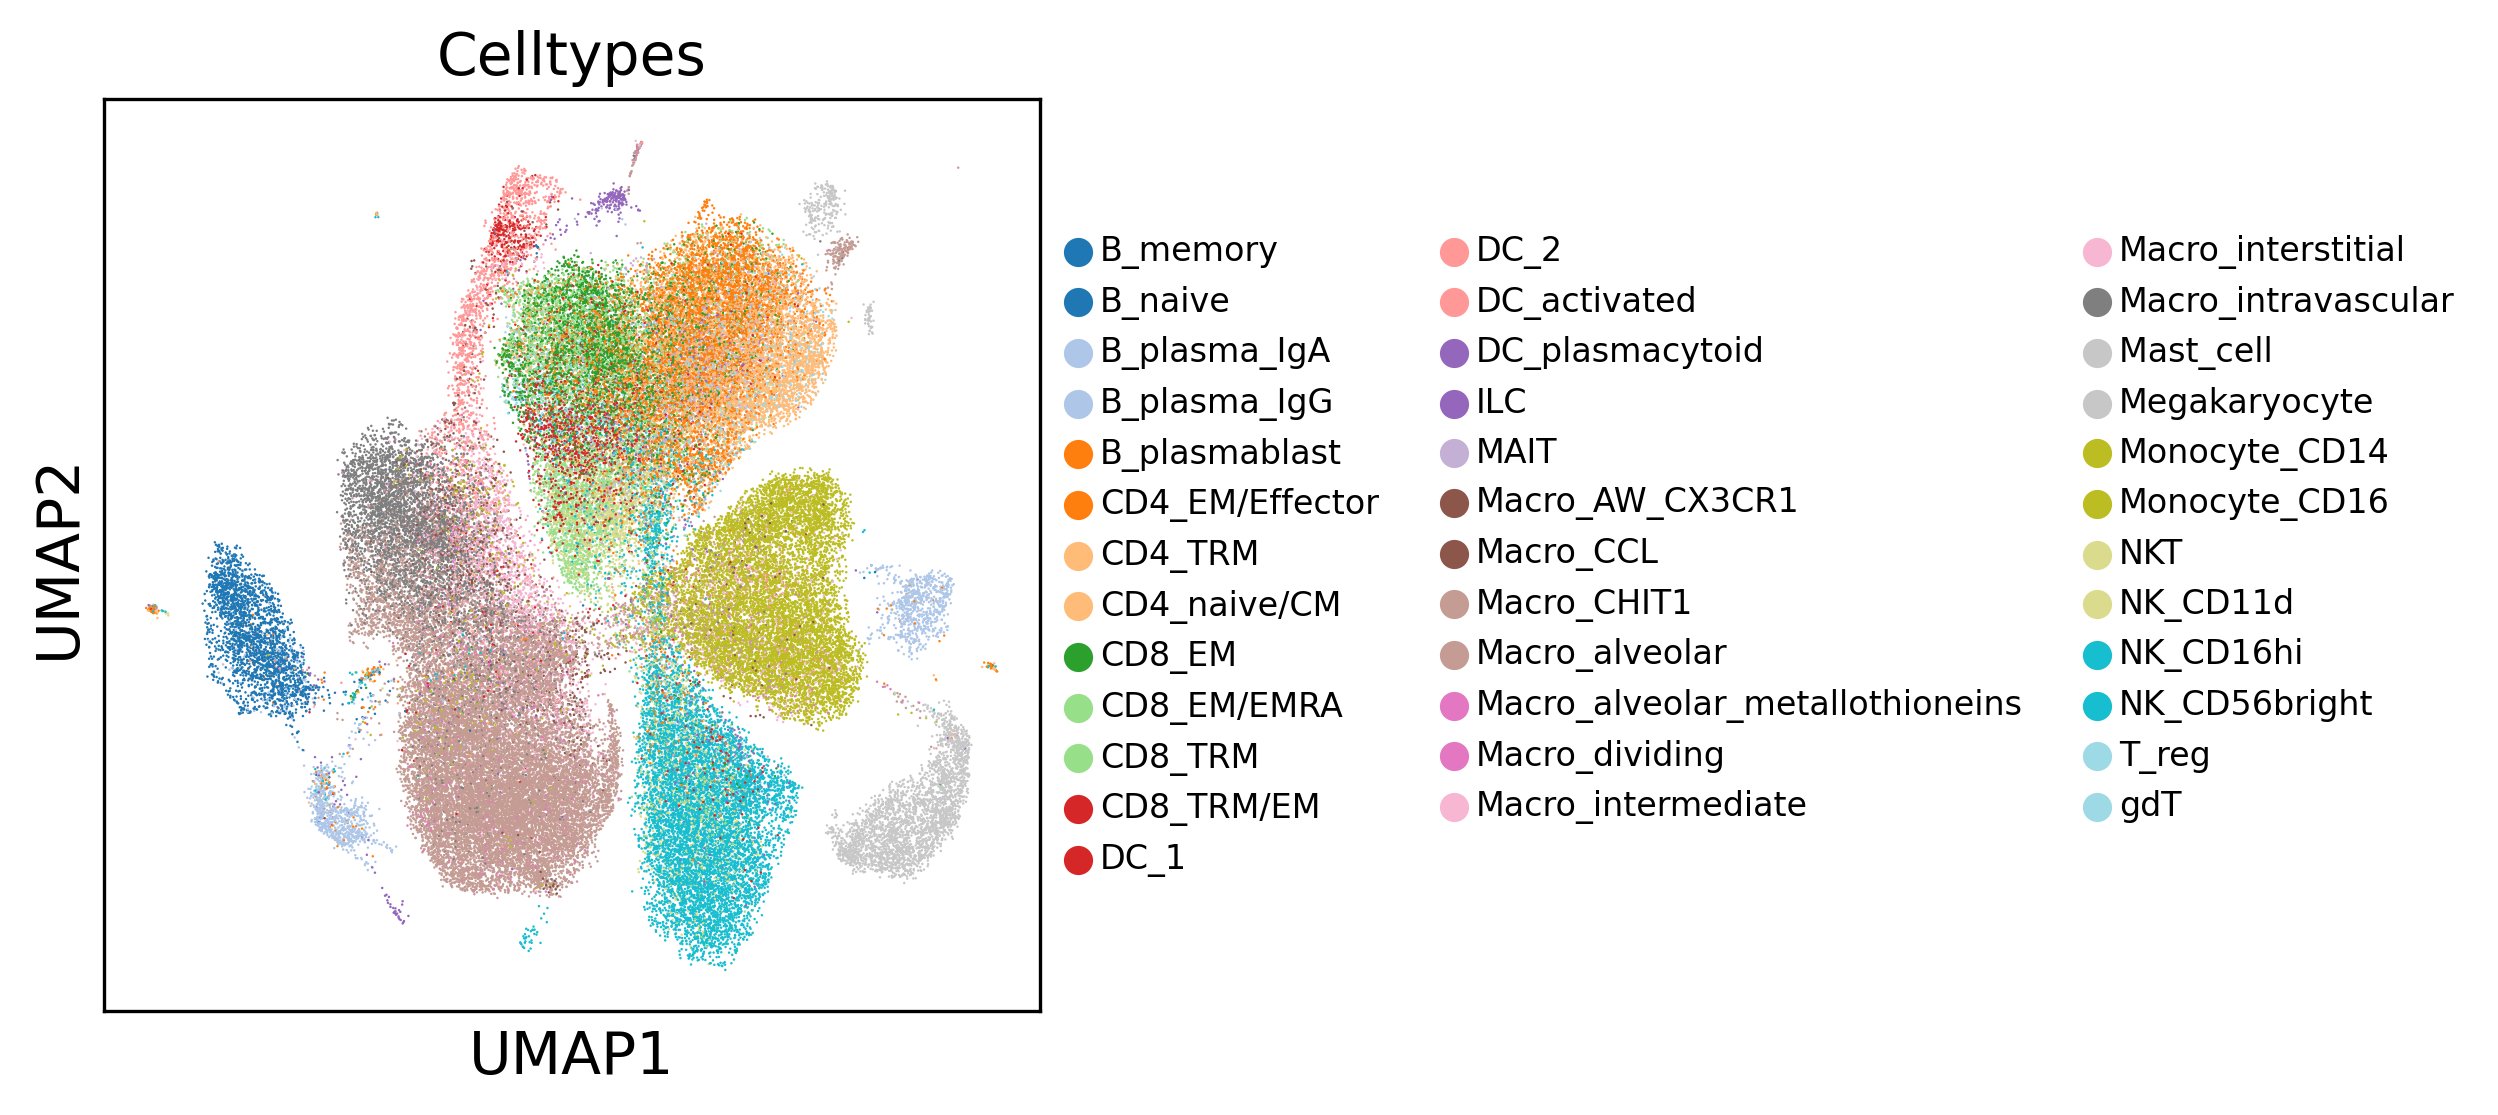

In [13]:
sc.pl.umap(adata_immune, color=["Celltypes"],#save= "Lymphoid.png",
           palette="tab20",legend_fontoutline=1, legend_fontsize=8)

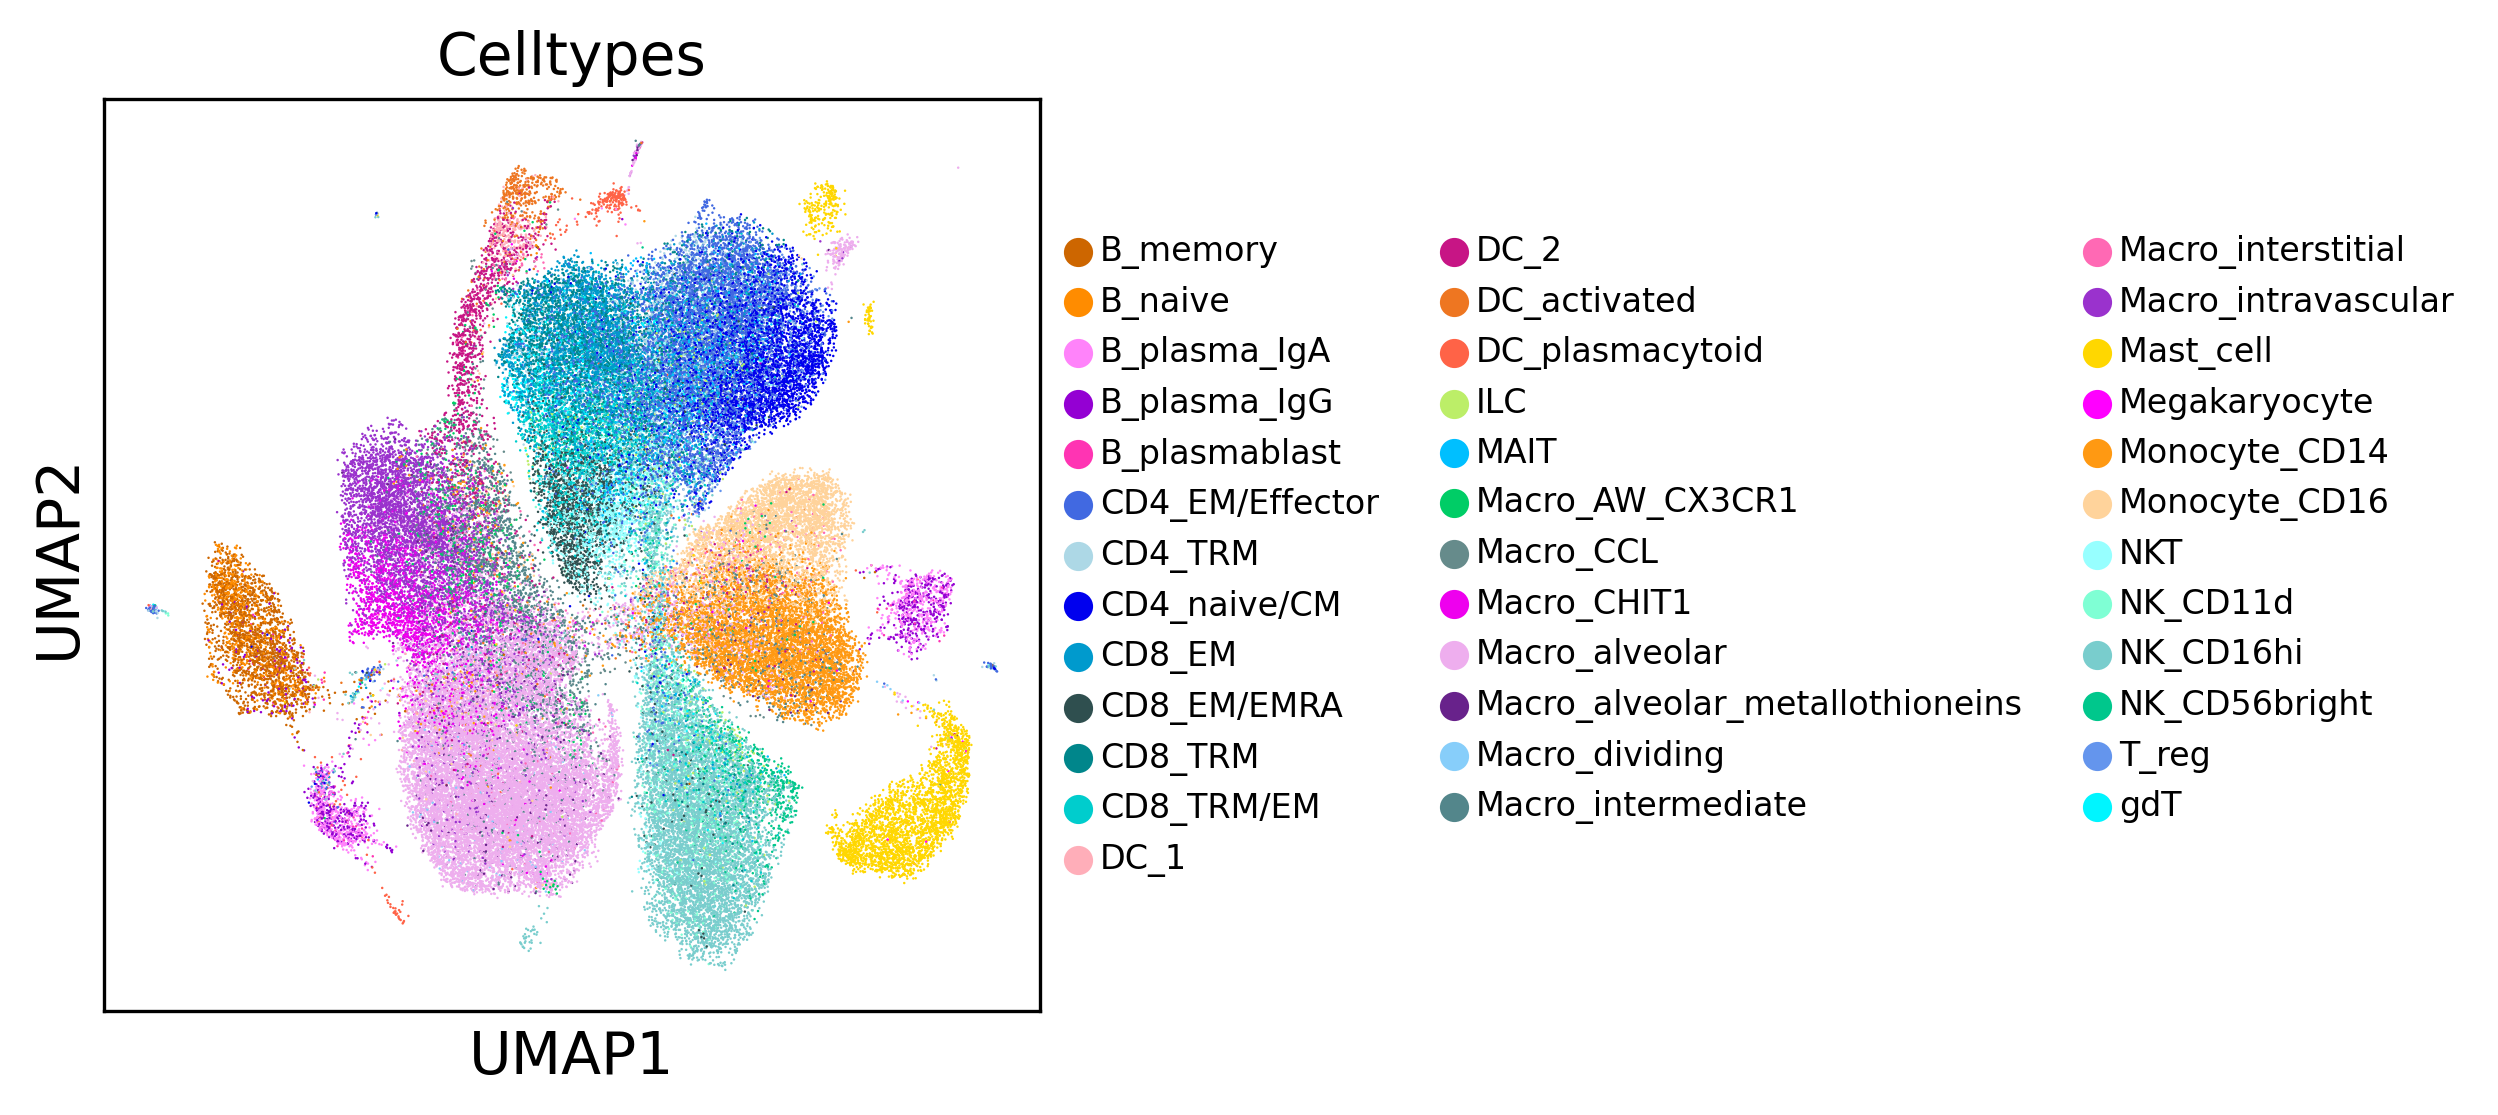

In [12]:
sc.pl.umap(adata_immune, color=["Celltypes"],#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

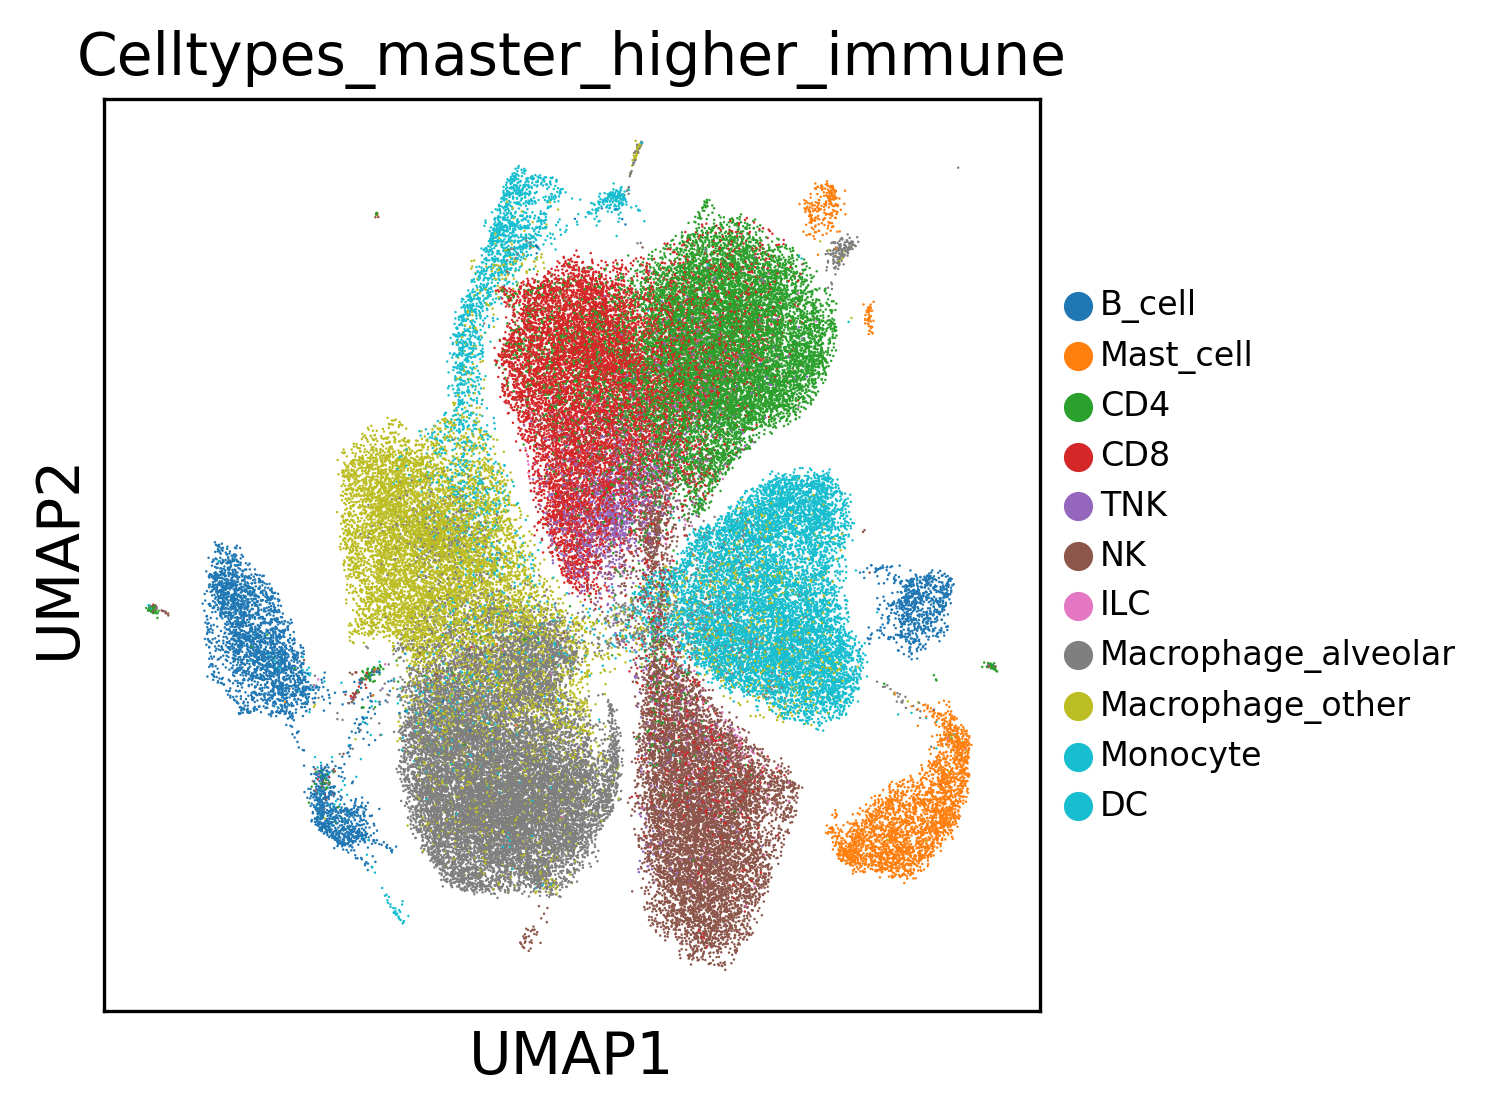

In [15]:
sc.pl.umap(adata_immune, color=["Celltypes_master_higher_immune"],#save= "Lymphoid.png",
           palette="tab10", legend_fontoutline=1, legend_fontsize=8)

In [18]:
adata_immune.obs['Celltypes_master_higher_immune'].cat.categories

Index(['B_cell', 'Mast_cell', 'CD4', 'CD8', 'TNK', 'NK', 'ILC',
       'Macrophage_alveolar', 'Macrophage_other', 'Monocyte', 'DC'],
      dtype='object')

In [19]:
anno_lineage = {
    ## Bcells
    'B_cell': "Bcells",    
    ## Tcells
    'CD4' : "Tcells",
    'CD8' : "Tcells",
    'TNK' : "Tcells",
    'NK'  : "Tcells",
    'ILC' : "Tcells",
    ## Myeloid
    'Macrophage_alveolar' : "Myeloid",
    'Macrophage_other' : "Myeloid",
    'Monocyte' : "Myeloid",
    'DC' : "Myeloid"    
}

In [20]:
adata_immune.obs['Lineage_anno'] = adata_immune.obs['Celltypes_master_higher_immune']
adata_immune.obs['Lineage_anno'] = (
    adata_immune.obs["Celltypes_master_higher_immune"]
    .map(anno_lineage)
.astype('category')
)

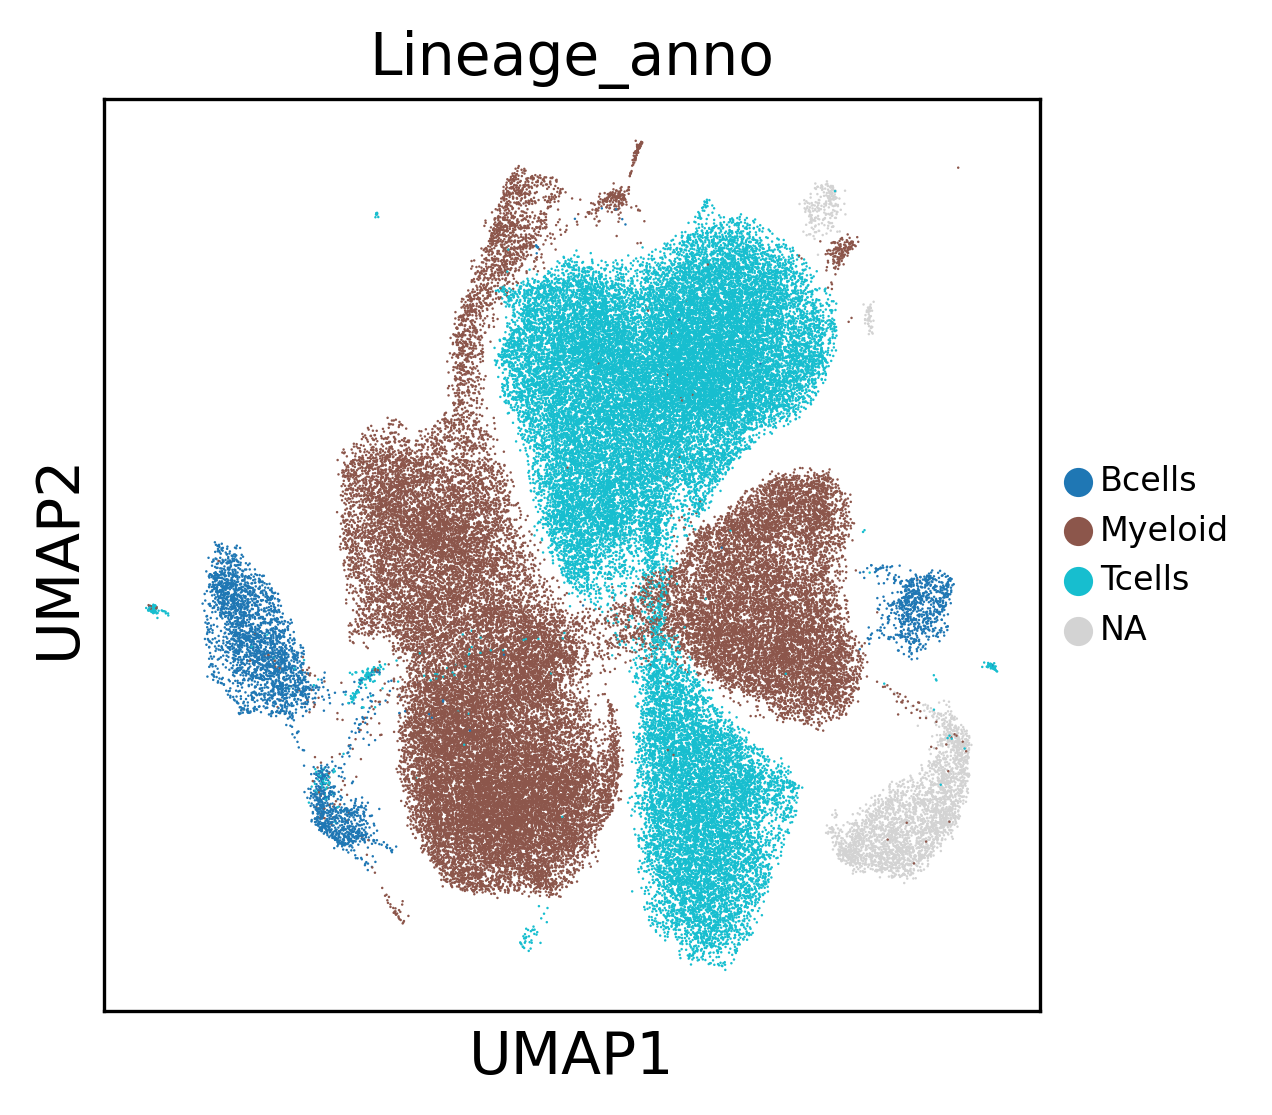

In [21]:
sc.pl.umap(adata_immune, color=["Lineage_anno"],#save= "Lymphoid.png",
           palette="tab10", legend_fontoutline=1, legend_fontsize=8)

## Subset Bcells

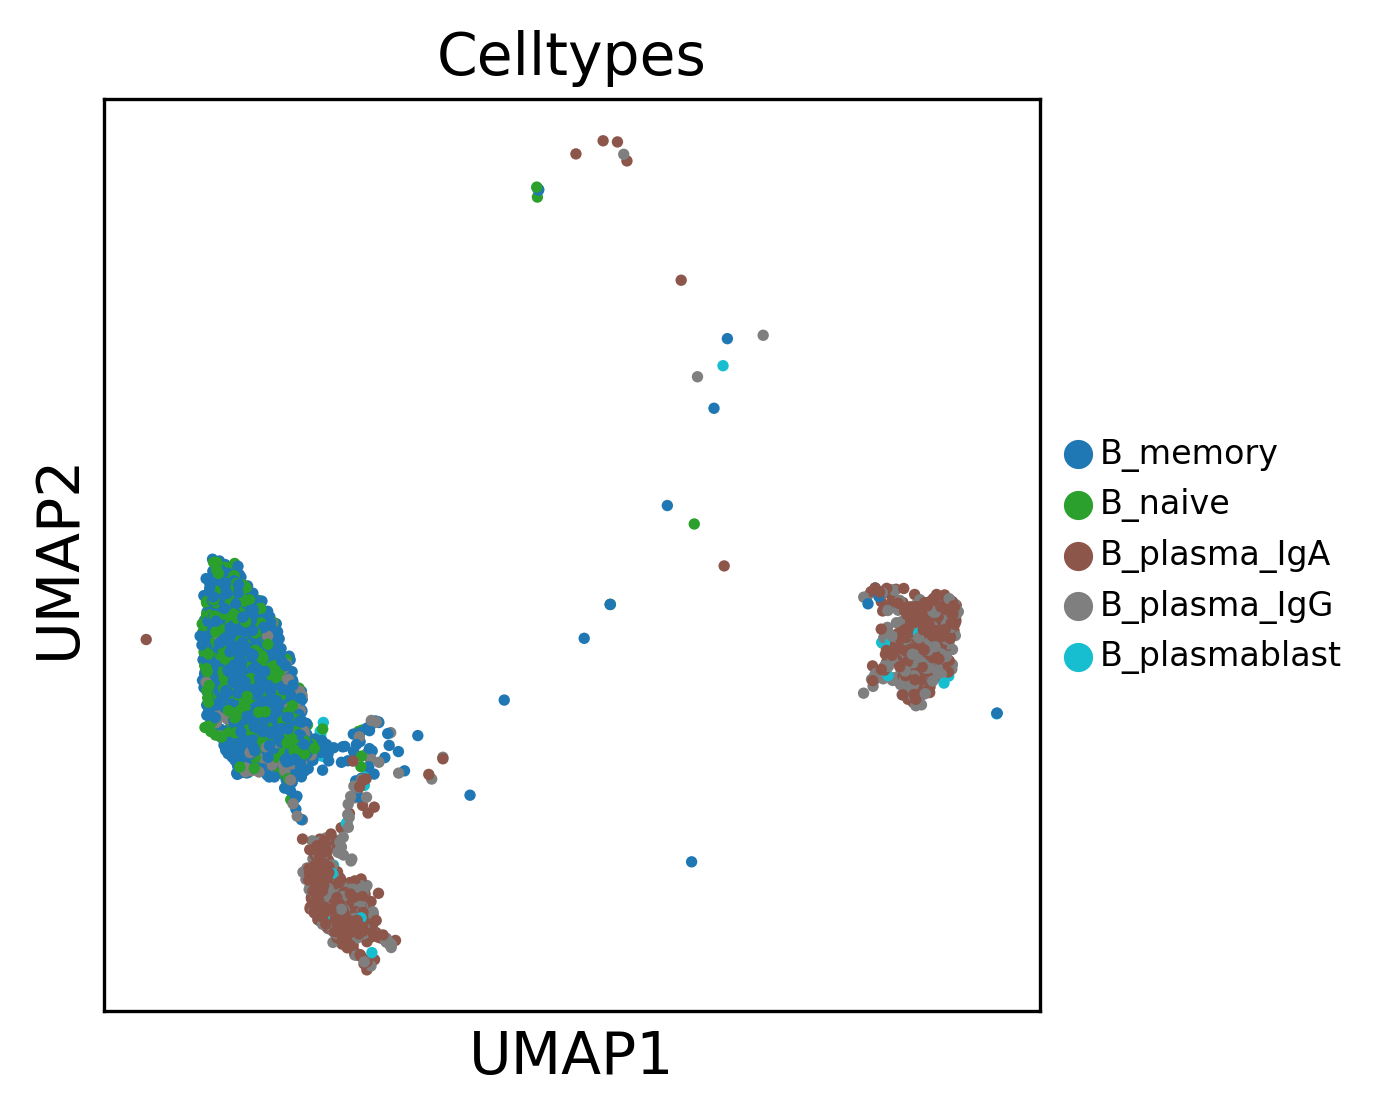

In [26]:
adata_Bcells = adata_immune[adata_immune.obs['Lineage_anno'].isin(['Bcells'])]
sc.pl.umap(adata_Bcells, color=["Celltypes"],#save= "Lymphoid.png",
           palette="tab10", legend_fontoutline=1, legend_fontsize=8)

In [27]:
adata_Bcells .write(storage_path + 'Lung_Bcells.h5ad' )

## Subset Tcells

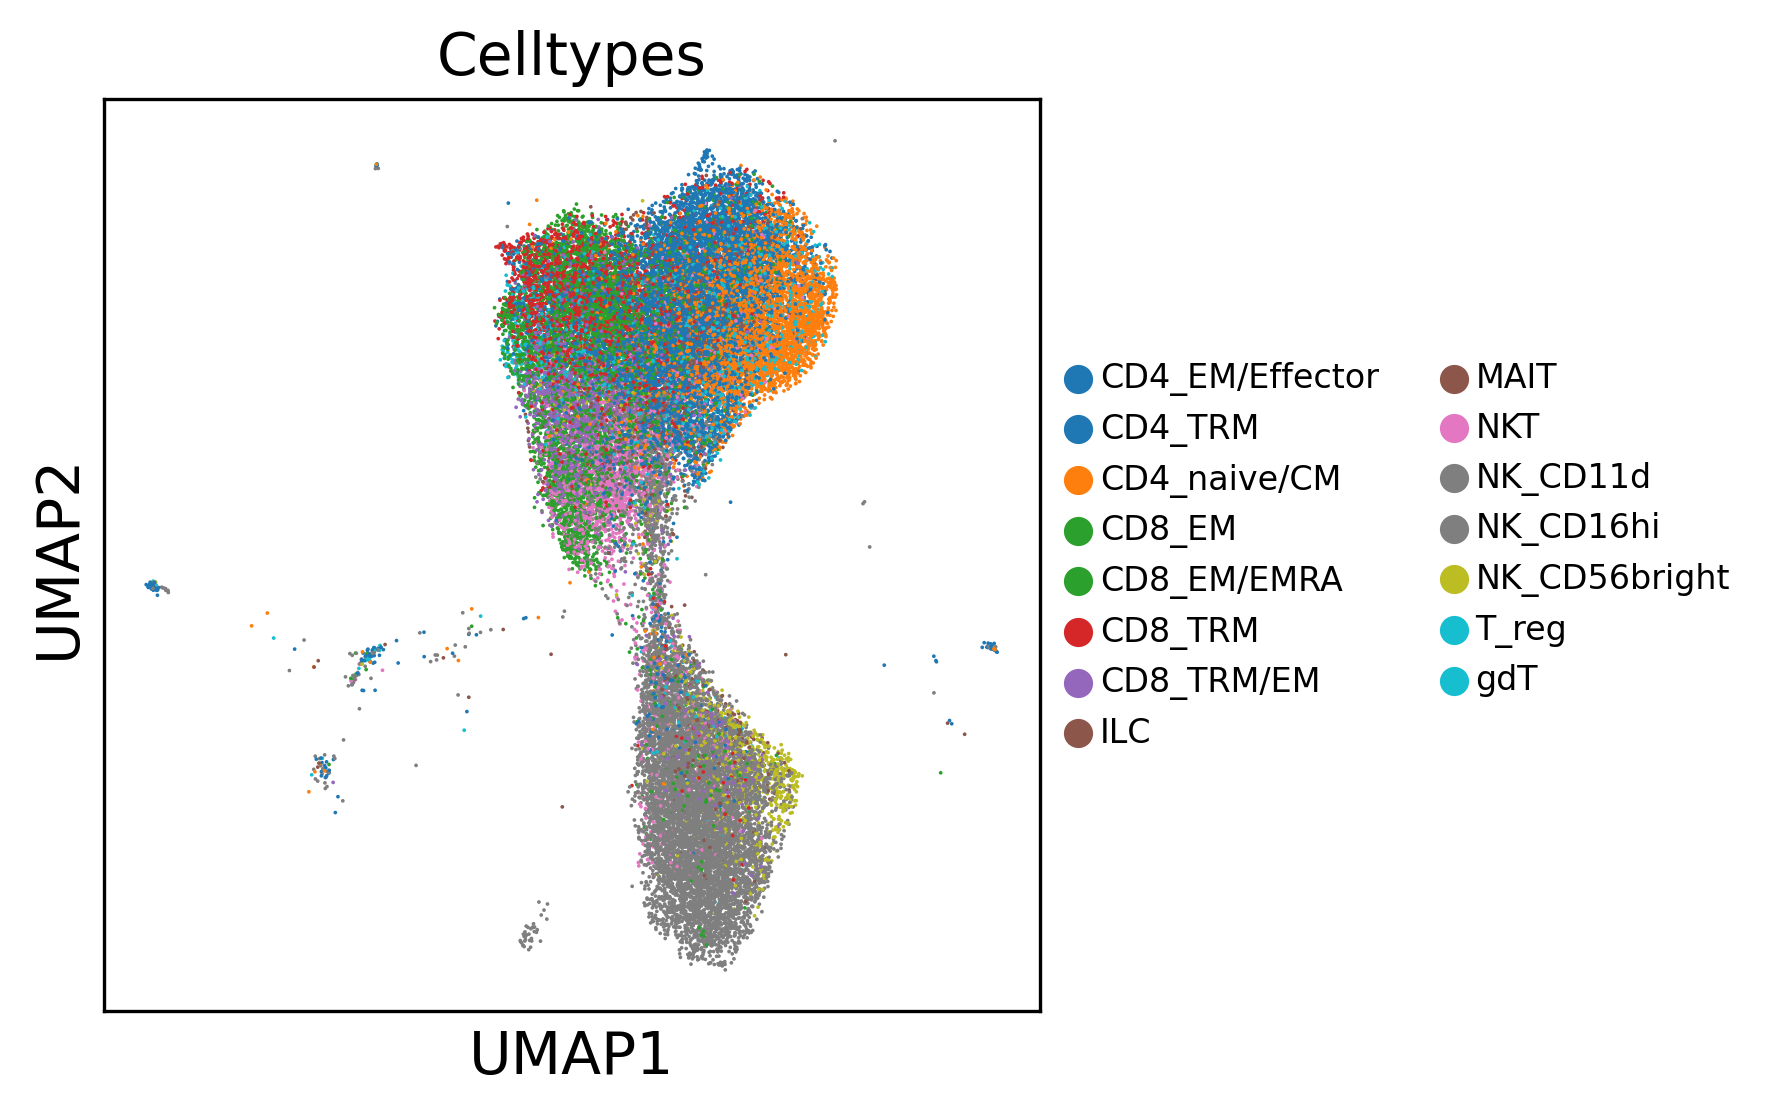

In [28]:
adata_Tcells = adata_immune[adata_immune.obs['Lineage_anno'].isin(['Tcells'])]
sc.pl.umap(adata_Tcells, color=["Celltypes"],#save= "Lymphoid.png",
           palette="tab10", legend_fontoutline=1, legend_fontsize=8)

In [29]:
adata_Tcells .write(storage_path + 'Lung_Tcells.h5ad' )

## Subset Myeloid

/home/irepan/anaconda3/envs/pyscenic/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


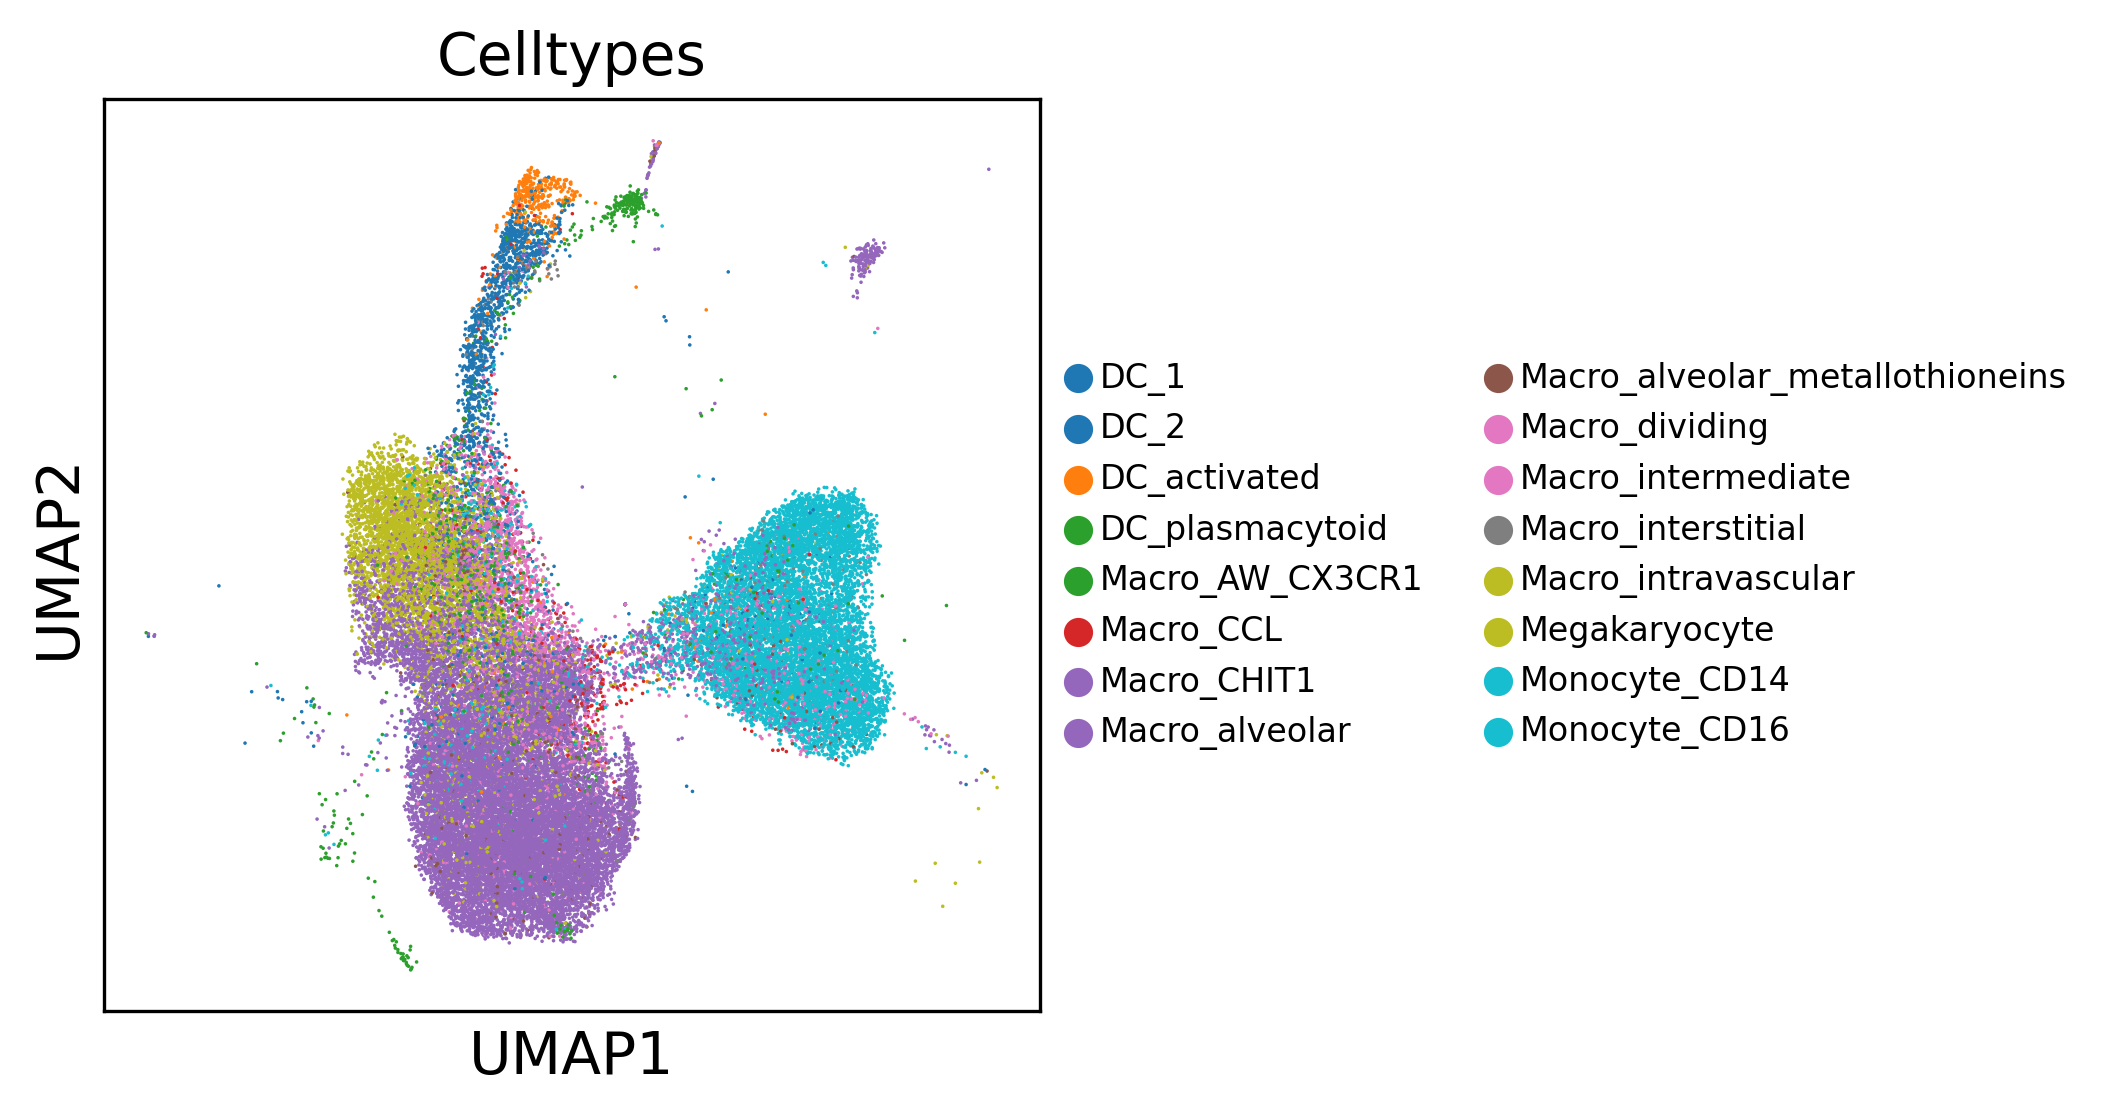

In [30]:
adata_Myeloid = adata_immune[adata_immune.obs['Lineage_anno'].isin(['Myeloid'])]
sc.pl.umap(adata_Myeloid, color=["Celltypes"],#save= "Lymphoid.png",
           palette="tab10", legend_fontoutline=1, legend_fontsize=8)

In [31]:
adata_Myeloid.write(storage_path + 'Lung_Myeloid.h5ad' )